Osnabrück University - Machine Learning (Summer Term 2020) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 05: Dimension Reduction

## Introduction

This week's sheet should be solved and handed in before the end of **Saturday, May 30, 2020**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Derivatives in higher dimensions) [0 Points]

This exercise is supposed to be very easy but in this and the following sheets we will give points. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a partial derivative? What is a directional derivative? How are these computed?

The partial derivative $f_{x_1}=\frac{∂f}{∂x_i}$ is a derivative of a **function with more than one variable**, where only **one of the variables is derived**. The other variables are treated as constants.

The directional derivative is calculated by taking more than one variable into account. It computes the direction of this function given by a vector. The directional derivative at a point $x$ in direction of $v$ is calculated by taking the limes.

$$D_vf(x)=\lim_{h \to 0}\frac{f(x=h*v)-f(x)}{h}$$ 

**b)** What is the gradient, the Jacobian matrix, and the Hessian matrix? How are they computed?

Gradient: Der Gradient als Operator der Mathematik verallgemeinert die bekannten Gradienten, die den Verlauf von physikalischen Größen beschreiben. Als Differentialoperator kann er auf ein Skalarfeld angewandt werden und wird in diesem Fall ein Vektorfeld liefern, das Gradientenfeld genannt wird. Der Gradient ist eine Verallgemeinerung der Ableitung in der mehrdimensionalen Analysis. Zur besseren Abgrenzung zwischen Operator und Resultat seiner Anwendung bezeichnet man solche Gradienten skalarer Feldgrößen in manchen Quellen auch als Gradientvektoren. Quelle: [Wiki](https://de.wikipedia.org/wiki/Gradient_(Mathematik))

Jacobian matrix: matrix of partial derivatives in all the dimensions

Hessian matrix: square matrix of second-order partial derivatives of a scalar-valued function or scalar field

**c)** What is the chain rule (in calculus)? How does it look in the higher-dimensional case?

The chain rule applies to the derivative of two compositioned functions. Let $\circ$ mean the composition of two functions. It holds that $$(u \circ v)'(x_0)=u'(v(x_0)) * v'(x_0)$$. 

For higher functions this also holds, but is more complicated.

For two functions $u$ and $v$ which are n-times differenciable


![grafik.png](attachment:grafik.png) (source: [Wiki](https://de.wikipedia.org/wiki/Kettenregel))


## Assignment 1: Curse of Dimensionality [5 Points]

For the following exercise, be detailed in your answers and provide some examples. Think about keywords like: random vectors in high dimensional space, manifolds and Bertillonage.

**a)** What are the curse of dimensionality and its implication for pattern classification? 

The problem with high dimensionality is the combinatorial explosion due to the exponentiality of the combinatorial possibilities. The dimensional space becomes $n^d$ big, if $d$ is the number of dimensions (variables) and $n$ the number of possibilities for each variable. This number becomes very large very quickly.

Then again, the percentage of actual combinatorial values existing in a dataset compared to the entire data dimensional space is in practice very small. This means the higher the dimensionality, the more data you need to cover the entire space (exponential growth).

Most of the time not the entire dimensions space will be filled with actual data, because so many training samples can't be taken in reality. But for pattern classification, you need a certain amount of training data relative to the dimension space in order to accurately classify the data. This means that if you randomly draw two data vectors from the vector space, the possibility of those being orthogonal to each other is very very high.

Take the example from week 1, where the two people wanted to go to the amusement park: There were four variables (driving distance, ticket price, rollercoasters, dinosaurs) which each two possible values. This means, there are $2^4$ (which are 16) possibilities. With 5 training examples, we covered $5/16$ (which is about 31%) of the points. If we added two more attributes like whether it rained and whether the park was big, the possibilities add up to 64 already, so it quadrupled, showing the problem of exponentionality. We would need four times as many training examples to have the same coverage. This toy example is also far from reality, but it shows the impact of the exponential growth and in real natural examples usually there are a lot more attributes, so the exponential growth is even more dramatic.

**b)** Explain how this phenomenom could be used to one's advantage.

Alphonse Bertillon's **Bertillonage** is an example of an advantage of high dimensionality. He took 11 human features (so a dimensionality of 11), which, combined with the different values of those features, lead to such a big space, that the values were so unique it could almost distinguish every single human. So a high dimensionality is good if you want to individually label a high number of data vectors.

**c)** Explain in your own words the concepts of descriptive and intrinsic dimensionality.

Descriptive dimensionality is the actual dimensionality of the data space, whereas intrinsic dimensionality describes only those dimensions, that convey actual information (i.e. those parameters, that are necessary to describe the data) about the data space. The intrinsic dimensionality of a dataset is significantly smaller than the descriptice dimensionality ($D_{intrinsic} \ll D_{descriptive}$).

Take hands for example: If you look at all possible hand joints $|Joints|=m$ and their possible angles $|Angles|=n$, the whole descriptive dimensionality is $m$ with a description space of $n^m$ possibilities. Because of the high correlation between joint angles for different hand postures, the intrinsic dimensionality space is much smaller and conveys the information about the different hand postures, for example if all the fingers except the thumb are closed 👍.

**d)** The $n$-dimensional unit cube: A cube with edge length $d=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume and the length of the diagonal for $n = 1, 2, 3, 4, 5, 10, 100, 1000$. Do the same for $d=\frac{1}{2}$. Discuss the result.

In [6]:
# YOUR CODE HERE
from math import sqrt
def cube_volume(dim, edge_length=1):
    return edge_length ** dim

def cube_diagonal_length(dim, edge_length=1):
    return edge_length * sqrt(dim)

n = [1,2,3,4,5,10,100,1000]
print("edge length 1")
for dim in n:
    print(str(dim)+":", cube_volume(dim), cube_diagonal_length(dim))
print("\nedge length 0.5")
for dim in n:
    print(str(dim)+":", cube_volume(dim, 0.5), cube_diagonal_length(dim, 0.5))

edge length 1
1: 1 1.0
2: 1 1.4142135623730951
3: 1 1.7320508075688772
4: 1 2.0
5: 1 2.23606797749979
10: 1 3.1622776601683795
100: 1 10.0
1000: 1 31.622776601683793

edge length 0.5
1: 0.5 0.5
2: 0.25 0.7071067811865476
3: 0.125 0.8660254037844386
4: 0.0625 1.0
5: 0.03125 1.118033988749895
10: 0.0009765625 1.5811388300841898
100: 7.888609052210118e-31 5.0
1000: 9.332636185032189e-302 15.811388300841896


* Wenn ein Punkt um die Distanz $a$ ($a\neq 0$) a geradlinig verschoben wird, entsteht eine eindimensionale Strecke, mathematisch ein eindimensionaler Hyperwürfel. (Verschiebung in Richtung x-Achse)
* Wenn *diese* Strecke **senkrecht zu ihrer Dimension** um die Distanz $a$ verschoben wird, entsteht ein zweidimensionales Quadrat, eine Fläche, mathematisch ein zweidimensionaler Hyperwürfel. (Verschiebung in Richtung y-Achse)
* Wenn *dieses* Quadrat **senkrecht zu seinen beiden Dimensionen** um die Distanz $a$ verschoben wird, entsteht ein dreidimensionaler Würfel, mathematisch einem dreidimensionalen Hyperwürfel entsprechend.
* Allgemein: Wenn also ein n-dimensionaler Würfel senkrecht zu seinen $n$ Dimensionen um die Distanz $a$ verschoben wird, entsteht ein (n+1)-dimensionaler Hyperwürfel.

* Diagonal of a square: $\sqrt{d^2 + d^2} = \sqrt{2 * d^2} = d * \sqrt{2}$
* Diagonal of a cube: $\sqrt{d^2 + d^2 + d^2} = \sqrt{3 * d^2} = d * \sqrt{3}$


---------------------------------------------------
The diagonal increases with increasing dimension, because the number inside the squareroot increases.

Picturing the cube as a vector $x_{dim}=(d,d,...,d)$, to calculate the length of the vector you always add $+d^2$, which results in an increase of the number in the square root. For example dim=4 (let edge = 1) results in $(1,0,0,0)+(0,1,0,0)+(0,0,1,0)+(0,0,0,1) = (1,1,1,1)$. Since this is linear, the length of the diagonal for $d=0.5$ is exactly half of the length of the diagonal for $d=1$.

Obviously, for d = 1 the volume is the same regardless of the dimension.

Since the volume is calculated by multiplying all the edges of each dimension, the volume decreases for each dimension, if the edge is smaller than one.

**e)** The $n$-dimensional unit ball: A ball with radius $r=1$ in the $n$-dimensional space $\mathbb{R}^n$. Compute the volume for $n = 1,2,3,5,10,100,300,400$. Refer to https://en.wikipedia.org/wiki/Volume_of_an_n-ball for the formulae. 

Consider a $n$-dimensional unit orange consisting of the peel and the pulp: Let the thickness of the peel be $1\%$ of the radius. Compute the volume of the peel and compare to the volume of the whole orange for the same values of $n$. State the implications of your observations.

In [7]:
# YOUR CODE HERE
from math import factorial, pi

# Compute the gamma for the denominator of the ball function
def gamma(m):
    # The function is computed differently depending on if the dimension is even or odd
    if m - int(m) <=  0.1:
        return factorial(m - 1)
    else: 
        result = pi ** (1/2)
        m -= 1
        while m > 0:
            result *= m 
            m -= 1
        return result

# Compute the volume of an n-dimensional ball
def ball_volume(dim, radius=1):             
    return ((pi ** (dim / 2)) / gamma(dim / 2 + 1)) * (radius ** dim)

# Compute the volume of the orange peel as well as the percentage of peel 
# in the volume of an n-dimensional orange
def orange_peel(dim, radius=1, peel_width=0.01):
    volume_orange = ball_volume(dim, radius)
    volume_peel = volume_orange - ball_volume(dim, radius - peel_width)
    return (volume_peel, volume_peel / volume_orange)

assert round(ball_volume(2), 3) == 3.142  
assert round(ball_volume(3), 3) == 4.189
assert round(ball_volume(4), 3) == 4.935
assert round(ball_volume(5), 3) == 5.264
assert round(ball_volume(10), 3) == 2.550
assert round(ball_volume(12), 3) == 1.335

# Apparently for dim = 400 there integer can't be processed correctly anymore, because it's too small
n = [1,2,3,5,10,20,25,30,100,300,]#400]
print("volumes of n-dimensional balls")
for dim in n:
    print(str(dim)+":", ball_volume(dim))
print("\nvolume and percentage of orange peels")
for dim in n:
    print(str(dim)+":", orange_peel(dim))

volumes of n-dimensional balls
1: 2.0
2: 3.141592653589793
3: 4.188790204786391
5: 5.263789013914325
10: 2.550164039877345
20: 0.02580689139001405
25: 0.0009577224088231724
30: 2.1915353447830204e-05
100: 2.3682021018828293e-40
300: 6.540146748729183e-189

volume and percentage of orange peels
1: (0.020000000000000018, 0.010000000000000009)
2: (0.0625176938064369, 0.019900000000000004)
3: (0.12441125787236018, 0.029700999999999898)
5: (0.25797803690886933, 0.04900995010000001)
10: (0.24384139388023618, 0.09561792499119554)
20: (0.0046992558843033175, 0.18209306240276926)
25: (0.00021278546286530712, 0.2221786406008533)
30: (5.704558319534067e-06, 0.26029962661171974)
100: (1.5013635419224746e-40, 0.6339676587267707)
300: (6.219412104814092e-189, 0.9509591059287144)


The volumes for the unit balls for $n \in \{1, ..., 12\}$ have the highest value for dimension 5 and then go down again, (see [Wiki](https://en.wikipedia.org/wiki/Volume_of_an_n-ball#Low_dimensions)). In higher dimensions "\[T\]he volume of an n-ball of radius R approaches zero as n tends to infinity." (see [Wiki](https://en.wikipedia.org/wiki/Volume_of_an_n-ball#High_dimensions)). We added the dimensions 20, 25 and 30 to illustrate this (because the numbers get smaller, but are still big enough to see that the volume approaches 0).

For the orange peel example we can observe, that the higher the dimension of the orange, the higher the percentage of the peel volume. This illustrates that most of the data in a high dimensional data space is present in a small intrinsic dimension.

## Assignment 2: Implement and Apply PCA [8 Points]

In this assignment you will implement PCA from the ground up and apply it to the `cars` dataset (simplified from the JSE [2004 New Car and Truck Data](http://www.amstat.org/publications/jse/jse_data_archive.htm)). This dataset consists of measurements taken on 97 different cars. The eleven features measured are: Suggested retail price (USD), Price to dealer (USD), Engine size (liters), Number of engine cylinders, Engine horsepower, City gas mileage, Highway gas mileage, Weight (pounds), Wheelbase (inches), Length (inches) and Width (inches). 

We would like to visualize these high dimensional features to get a feeling for how the cars relate to each other so we need to find a subspace of dimension two or three into which we can project the data.

In [3]:
import numpy as np

# TODO: Load the cars dataset in cars.csv .
# YOUR CODE HERE
cars = np.loadtxt('cars.csv', delimiter=',')
assert cars.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)

Excecute the following code which will create a scatter plot matrix (it might take some time to execute). This should give you an idea about trends and correlations in the dataset.

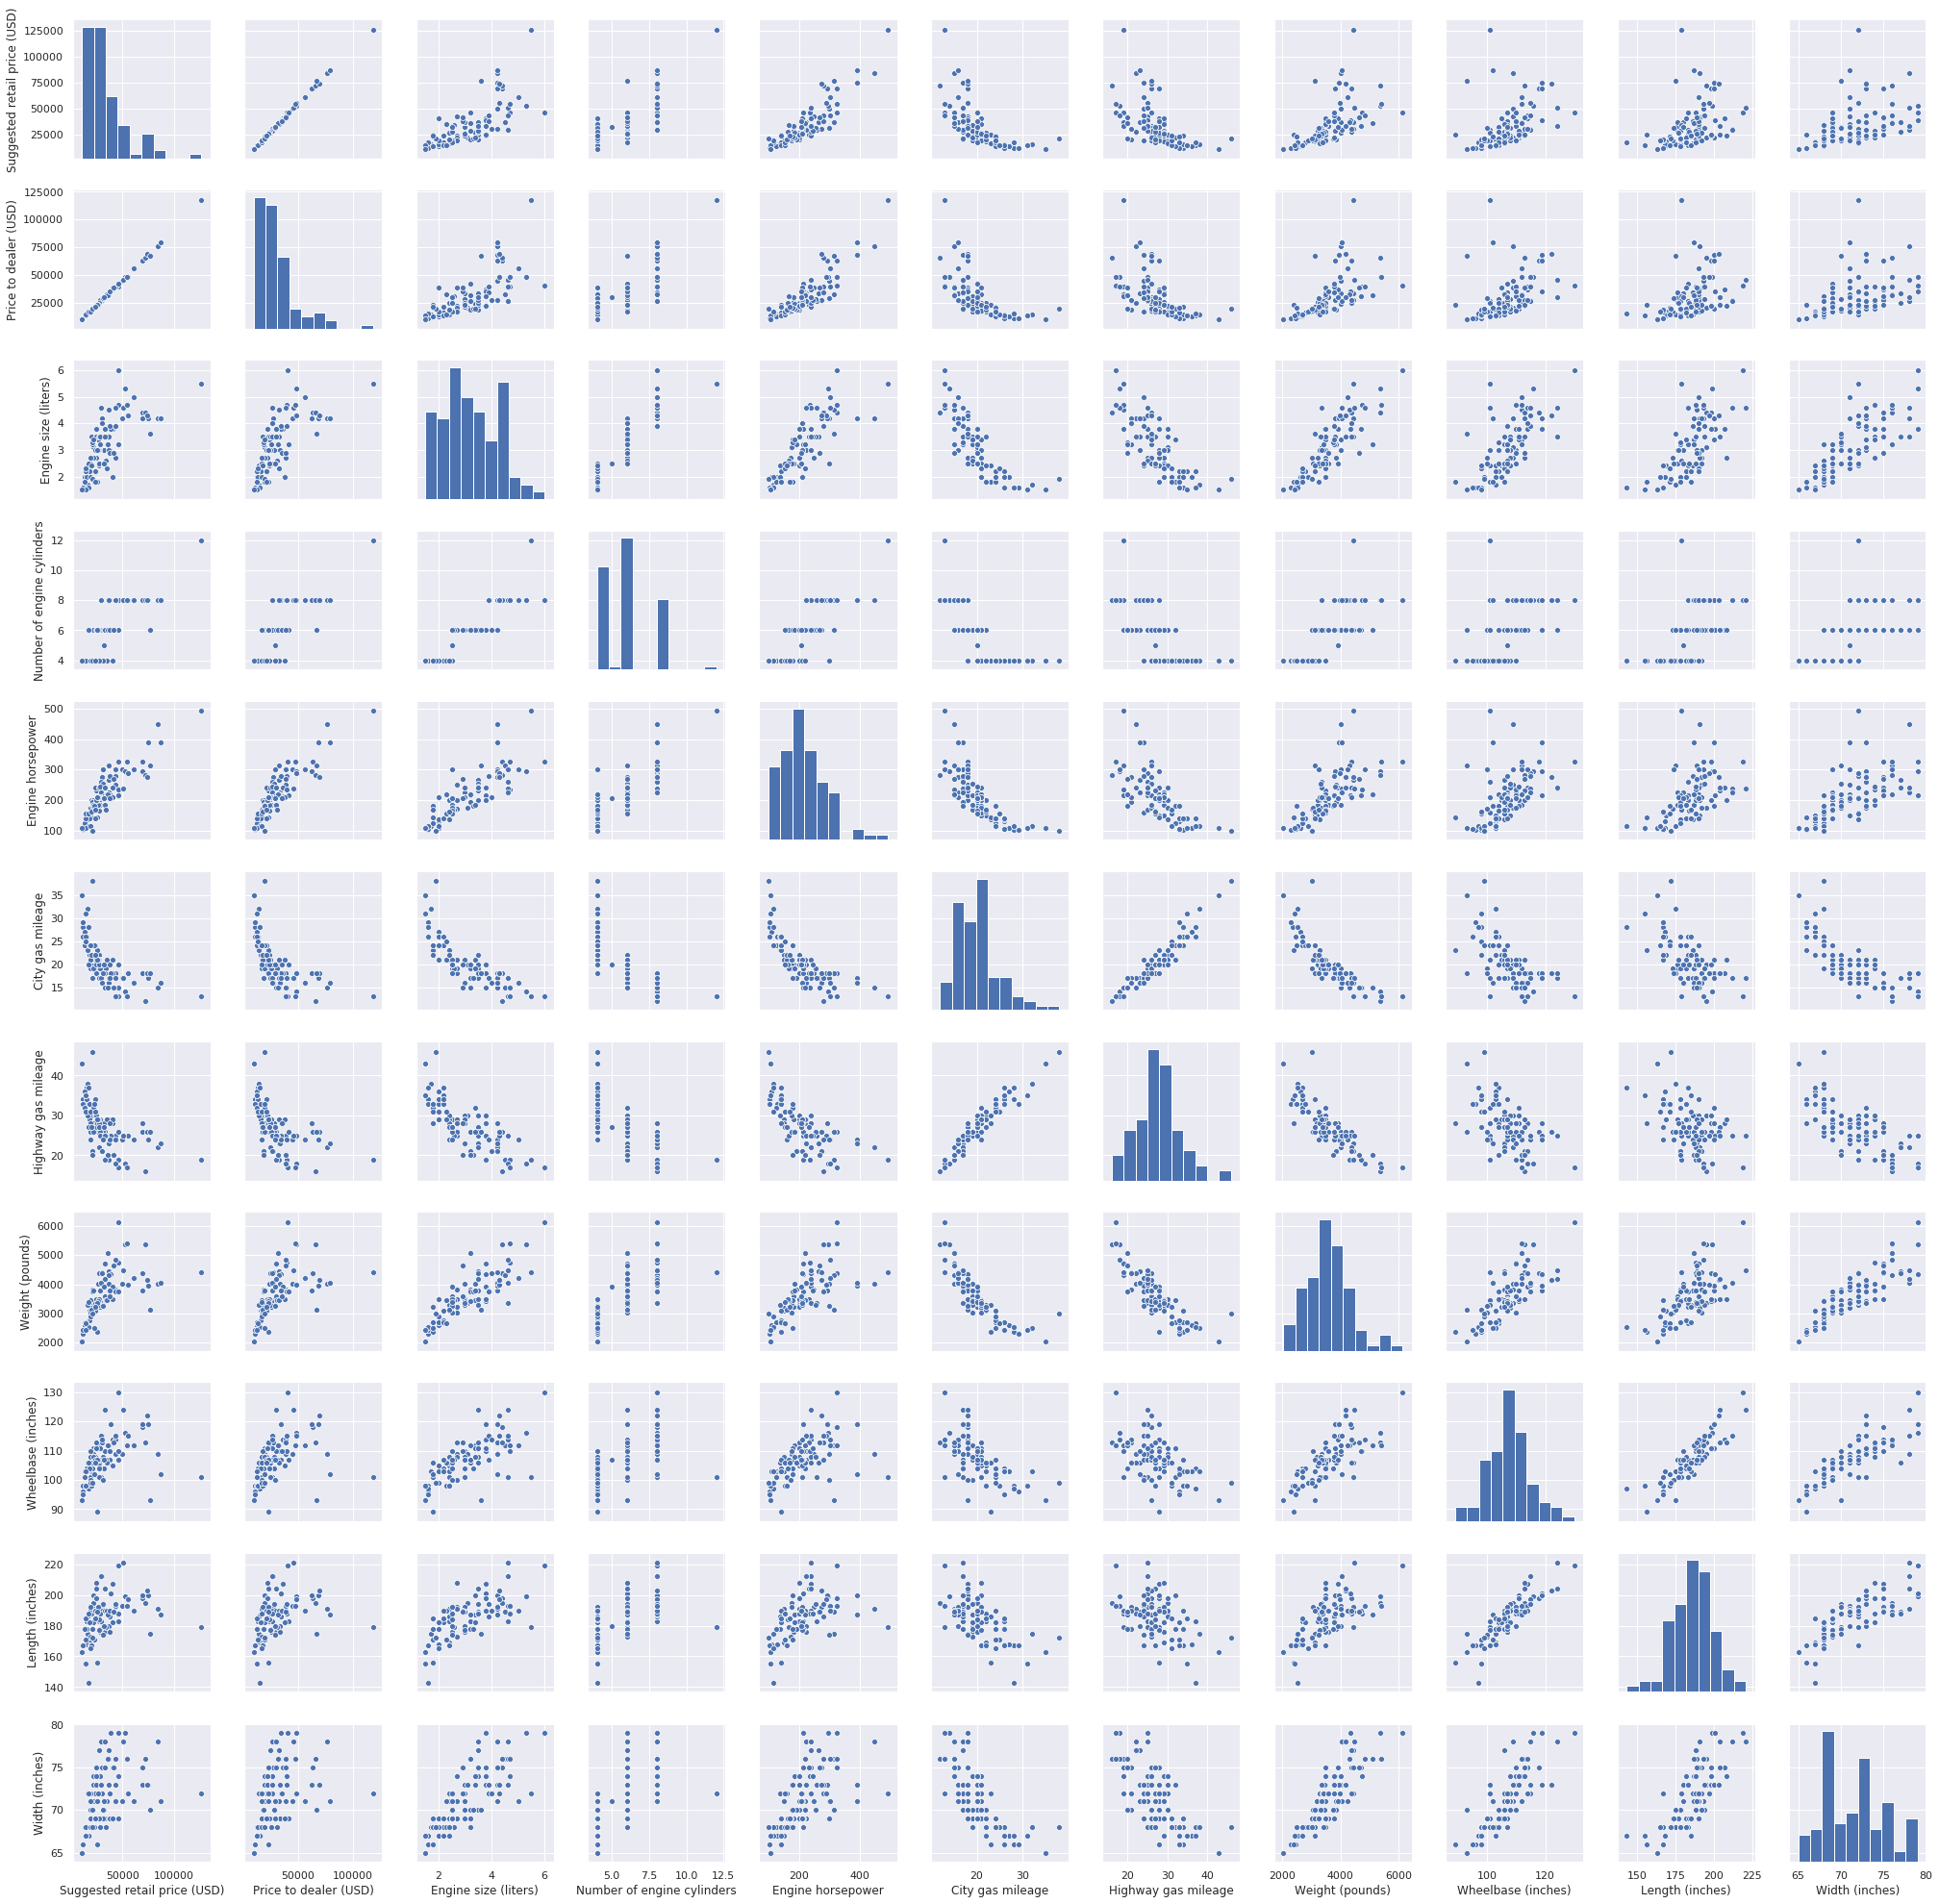

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()
cols = ['Suggested retail price (USD)', 'Price to dealer (USD)', 
          'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']

df = pd.DataFrame(cars, columns=cols)
sns.pairplot(df)

As a first step we need to normalize the data such that they have a zero mean and a unit standard deviation. Use the standard score for this:
$$\frac{X - \mu}{\sigma}$$

In [8]:
import numpy as np

# TODO: Normalize the data and store them in a variable called cars_norm.
cars_norm = (cars-np.mean(cars))/np.std(cars)

assert cars_norm.shape == (97, 11), "Shape is not (97, 11), was {}".format(cars.shape)
assert np.abs(np.sum(cars_norm)) < 1e-10, "Absolute sum was {} but should be close to 0".format(np.abs(np.sum(cars_norm)))
assert np.abs(np.sum(cars_norm ** 2) / cars_norm.size - 1) < 1e-10, "The data is not normalized, sum/N was {} not 1".format(np.sum(cars_norm ** 2) / cars_norm.size)

What is the covariance matrix of a dataset? What do the different entries of the matrix mean? 

The covariance $\sigma (x,y)$ of two random variables x and y is:

$\sigma (x,y) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}).$

The covariance matrix is given by $C_{i,j} = \sigma (x_i, x_j)$, with C  $\in \mathbb{R}^{d \times d}$ and d as the dimension or number of random variables of the data set.

For a data set $X \in \mathbb{R}^{n \times d}$ the calculation of the covariance matrix can also be denoted by:

$C = \frac{1}{n-1} \sum_{i=1}^n{(X_i - E[X])(X_i - E[X])^T} $

The single elements of the matrix are the covariances between the different variables. On the diagonal, you can therefore find the variances of each single variable. The covariance matrix is symmetric.

PCA finds a subspace that maximizes the variance by determining the eigenvectors of the (auto)covariance matrix. So we need to calculate the covariance matrix and afterwards the eigenvalues. When the data is normalized the autocovariance is calculated as
$$C = X^T\cdot X$$
with $X$ being an $m \times n$ matrix with $n$ features and $m$ samples.
The entry $c_{i,j}$ in $C$ tells you how much feature $i$ correlates with feature $j$. 
(Note: sometimes the formula $C=X\cdot X^T$ can be found, i.e., with rows and columns swapped. This depends on whether your put the individual datapoints as rows or columns in you matrix $X$. However, in the end you want to know how the individual features correlate, i.e., in our example you want a $11\times11$-matrix).

In [9]:
import numpy as np

# TODO: Compute the autocovariance matrix and store it into autocovar
# YOUR CODE HERE
#start
autocovar = cars_norm.T @cars_norm
#end
assert autocovar.shape == (11, 11)

# TODO: Compute the eigenvalues und eigenvectors and store them into eigenval and eigenvec
#       (Figure out a function to do this for you)
# YOUR CODE HERE
def eig_from_cov(matrix):
    eigen = np.linalg.eig(matrix)
    return eigen[0], eigen[1]

eigenval = eig_from_cov(autocovar)[0]
eigenvec = eig_from_cov(autocovar)[1]

assert eigenval.shape == (11,)

assert eigenvec.shape == (11, 11)

Plot the spectrum of the eigenvalues to make sure that they are sorted by their magnitude. How many principal components should you include based on the spectrum plot?

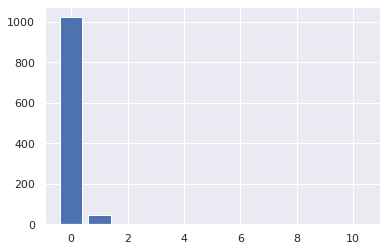

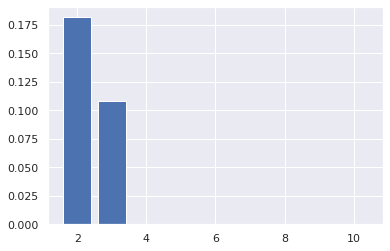

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE
# this shows the eigenvalues in a bar plot (sorted by magnitude)
x = np.arange(0,11)
plt.bar(x,eigenval)
plt.show()

# as the first two eigenvalues appear on the bar plot and the others don't,
# one can see already that there is a big difference between the values
# another big difference is between the fourth and the fifth eigenvalue (but in anther scale)
plt.bar(x[2:11],eigenval[2:11])
plt.show()

Now you should have a matrix full of eigenvectors. We can now do two things: project the data down onto the two dimensional subspace to visualize it and we can also plot the two first principle component vectors as eleven two dimensional points to get a feeling for how the features are projected into the subspace. Execute the cells below and describe what you see. Is PCA a good method for this problem? Was it justifiable that we only considered the first two principle components? What kinds of cars are in the four quadrants of the first plot? (**put your answer in the cell below of this code cell**)

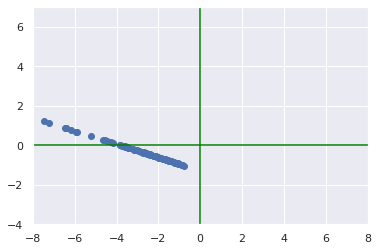

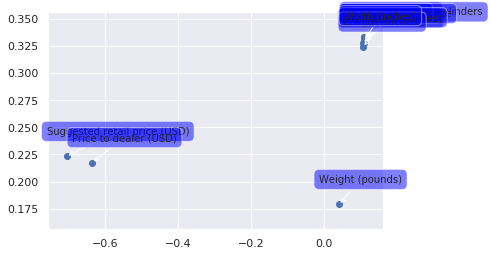

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Project the data down into the two dimensional subspace
proj = cars_norm @ eigenvec[:,0:2]

# Plot projected data
fig = plt.figure('Data projected onto first two Principal Components')
fig.gca().set_xlim(-8, 8)
fig.gca().set_ylim(-4, 7)
plt.scatter(proj[:,0], proj[:,1])
# Divide plot into quadrants
plt.axhline(0, color='green')
plt.axvline(0, color='green')
# force drawing on 'run all'
fig.canvas.draw()

# Plot eigenvectors
eig_fig = plt.figure('Eigenvector plot')
plt.scatter(eigenvec[:,0], eigenvec[:,1])

# add labels
labels = ['Suggested retail price (USD)', 'Price to dealer (USD)', 
          'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)']
for label, x, y in zip(labels, eigenvec[:,0], eigenvec[:,1]):
    plt.annotate(
        label, xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'blue', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
# force drawing on 'run all'
eig_fig.canvas.draw()

##### Describe what you see. 

In the first plot, you can see the projection onto the first two principle components, chosen above.
The projected data points concentrate in a descending line in the second and third quadrant, leaving the first and fourth quadrant empty.
(They now seem to represent a scale and can be defined by having a certain position on that scale.)

In the second plot, one can see the two first principle component vectors as eleven two dimensional points. 
This means that the loading for the different original features on the two principal components can be identified by looking at this plot.
It can be observed that the price data parts (price to dealer, suggested retail price) contribute with a rather high negative value to the first principle component, the weight contributes with a smaller positive loading and the other features seem to .

##### Is PCA a good method for this problem? 

Yes, the PCA is very helpful for this dataset because it allows us to now display the data in one two-dimensional graph and maybe now even perform a linear regression on this, so that a classification of the single data points would become very easy.

##### Was it justifiable that we only considered the first two principle components? 

Considering only two components was derived from the big difference between the second and the third largest eigenvalue. This is totally justifiable. (and leads to a nice )

(One the other hand, one could maybe argue that one could also just use the first principal component.)

##### What kinds of cars are in the four quadrants of the first plot?

I. cars with low 'Suggested retail price (USD)' and 'Price to dealer (USD)', 
   and high 'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)'

II. cars with high 'Suggested retail price (USD)', 'Price to dealer (USD)', 
    and also high 'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)'

III. cars with high 'Suggested retail price (USD)', 'Price to dealer (USD)', 
     and low 'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)'

IV. cars with low 'Suggested retail price (USD)', 'Price to dealer (USD)', 
    and low 'Engine size (liters)', 'Number of engine cylinders', 
          'Engine horsepower', 'City gas mileage' , 
          'Highway gas mileage', 'Weight (pounds)', 
          'Wheelbase (inches)', 'Length (inches)', 'Width (inches)'

## Assignment 3: PCA [3 Points]

In this exercise we investigate the statement from the lecture that PCA finds the subspace that captures most of the data variance. To be more precise, we show that the orthonormal projection onto an $m$-dimensional subspace that maximizes the variance of the projected data is defined by the principal components, i.e. by the $m$ eigenvectors of the autocorrelation matrix $C$ corresponding to the $m$ largest eigenvalues. The proof consists of two steps. In this exercise you will only proof the first step:

### First step:
Consider a one dimensional subspace: Determine a (unit) vector $\vec{p}$, such that the variance of the data, when projected onto the subspace determined by that vector, is maximal.

The autocorrelation matrix $C$ allows to compute the variance of the projected data as $\vec{p}^{T}C\vec{p}$. We want to maximize this expression. To avoid $\|\vec{p}\|\to\infty$ we will only consider unit vectors, i.e. we constrain $\vec{p}$ to be normalized: $\vec{p}^T\vec{p}=1$. Maximize the expression with this constraint (which can be done using a Lagrangian multiplier). Conclude that a suitable $\vec{p}$ has to be an eigenvector of $C$ and describe which of the eigenvectors is optimal.

To maximise the equation: 

$$\vec{p}^T C\vec{p} + \lambda(1-\vec{p}^T\vec{p})$$

we maximise by diffrentiating with respect to $\vec{p}$ and set it to 0, giving us the equation below: 

$$\frac{\partial}{\partial\vec{p}}\left[ \vec{p}^T C\vec{p} + \lambda(1-\vec{p}^T\vec{p})\right] = 0$$

=>

$$C\vec{p} - \lambda\vec{p} = 0$$

=> Rearranging the terms gives us:

$$C\vec{p} = \lambda\vec{p} $$

where, above equation is used as an eigenvector equation where $\vec{p}$ is eigenvector and associated $\lambda$ is eigenvalue.

To find optimal eigenvectors where $\vec{p}$ is an eigenvector of covariance matrix $C$ and $\lambda $ is the largest eigenvalue.
$$ \vec{p}^T C \vec{p}  =  \vec{p}^T \lambda \vec{p}  =  \lambda \vec{p}\vec{p} ^T   =  \lambda $$



### Second step:
(Outline for the interested reader. You do not have to solve this second part.)

In the second step the statement for the general case of an $m$-dimensional projection space is proofed by induction:

Assume the statement has been shown for the $(m-1)$-dimensional projection space, spanned by the $m-1$ (orthonormal) eigenvectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$ corresponding to the $(m-1)$ largest eigenvalues $\lambda_1,\ldots,\lambda_{m-1}$. Now find a (unit) vector $\vec{p}_m$, orthogonal to the existing vectors $\vec{p}_1,\ldots,\vec{p}_{m-1}$, that maximizes the projected variance $\vec{p}_m^TC\vec{p}_m$. Proceed similar to the first step, but with additional Lagrangian multipliers to enforce the orthogonality constraint. One can then show that the new vector $\vec{p}_m$ is an eigenvector of $C$. Finally it can be shown that the variance is maximized for the eigenvector corresponding to the $m$-th largest eigenvalue $\lambda_m$.

YOUR ANSWER HERE